# Name: Irfan Arshad(B21F0063AI019)
# Assignment# 03

# Task 1: Machine Learning Technique Selection and Justification
## Selection:
### Algorithm for Classification: Random Forest
Ensemble methods like Random Forest enhance predictive accuracy by combining multiple decision trees.

Robust to overfitting and handle a large number of features well.

### Justification:  
Random Forest is suitable for classification tasks, handles categorical variables well,

and is robust against overfitting. It's an ensemble method that combines multiple

decision trees to improve overall performance.

# Task 2: Pipeline Explanation (20 marks)
### Step-by-Step Pipeline:

Steps in the Pipeline:
#### 1. Data Preprocessing:

Handle missing values and outliers appropriately.
Encode categorical variables using techniques like one-hot encoding.
#### 2. Feature Engineering:

Create new features that might enhance model performance.
Scale numerical features to bring them to a similar range.
#### 3. Model Selection:

Implement decision trees, random forest, and SVM.
Tune hyperparameters using techniques like grid search or random search.
#### 4. Training:

Train each model on the training dataset.
#### 5. Testing and Validation:

Evaluate models on the test set.
Use cross-validation to assess generalization performance.

# 3.ResultsTraini,Testing and Validation (15 marks):
    •Train  the  mode.Test  and  validate  the  machine  learning  results  using  appropriate metrics. 
    
    Discuss the chosen metrics and their relevance to the problem

<h1> Importing the libraries </h1>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

<h2> The Dataset </h2>

<h1>Data dictionary</h1>

1. age (numeric)
2. job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
8. contact: contact communication type (categorical: 'cellular','telephone') 
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric) 
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

In [3]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.select_dtypes(include= 'object').head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [6]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:

df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

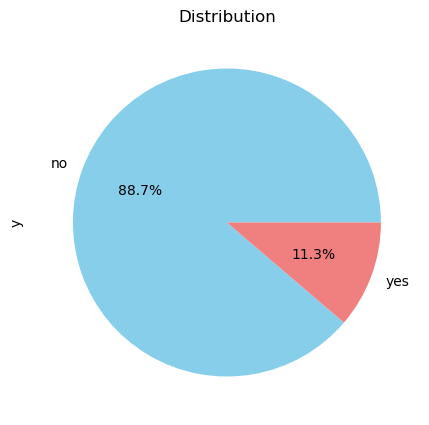

In [11]:
colors = ['skyblue', 'lightcoral']  # Replace these colors with your desired choices
df['y'].value_counts().plot(kind='pie', 
                            figsize=(12, 5), 
                            title='Distribution', 
                            colors=colors,  # Specify the colors
                            autopct='%1.1f%%')  # Display percentage labels

plt.show()

<AxesSubplot:title={'center':'Distribution'}>

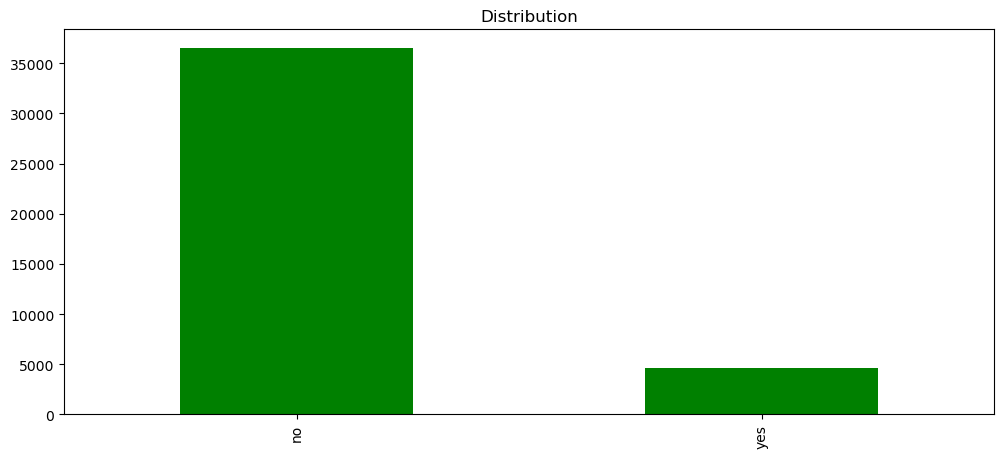

In [9]:
df['y'].value_counts().plot(kind = 'bar', 
                                 figsize = (12, 5), 
                                 title = 'Distribution', 
                                 cmap = 'ocean')

In [10]:
df["marital"].value_counts(normalize = True)

married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64

<AxesSubplot:title={'center':'Distribution'}>

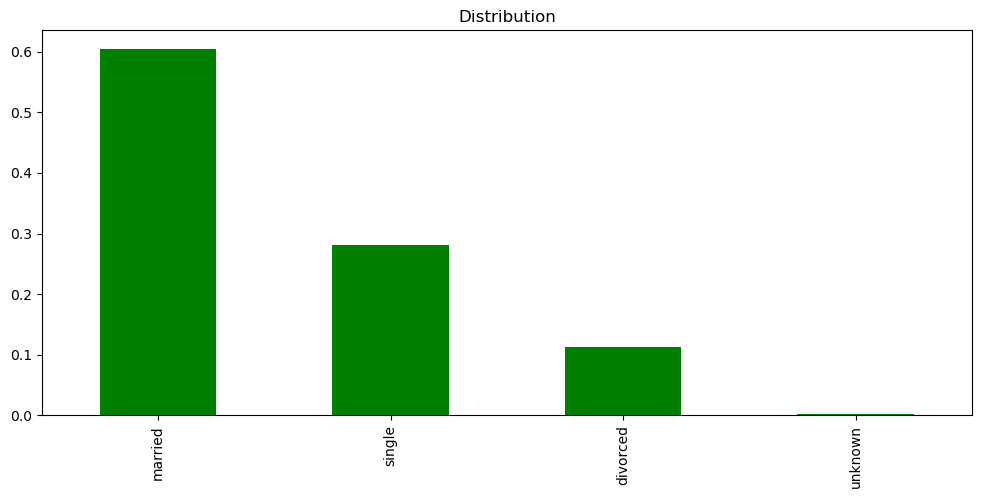

In [11]:
df['marital'].value_counts(normalize = True).plot(kind = 'bar', 
                                                         figsize = (12, 5), 
                                                         title = 'Distribution', 
                                                         cmap = 'ocean')

In [12]:
corr_matrix = df.corr()

In [13]:
corr_matrix

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [ ]:
plt.figure(figsize = (12, 5))
sns.heatmap(corr_matrix, 
            annot = True, 
            cmap = 'coolwarm')

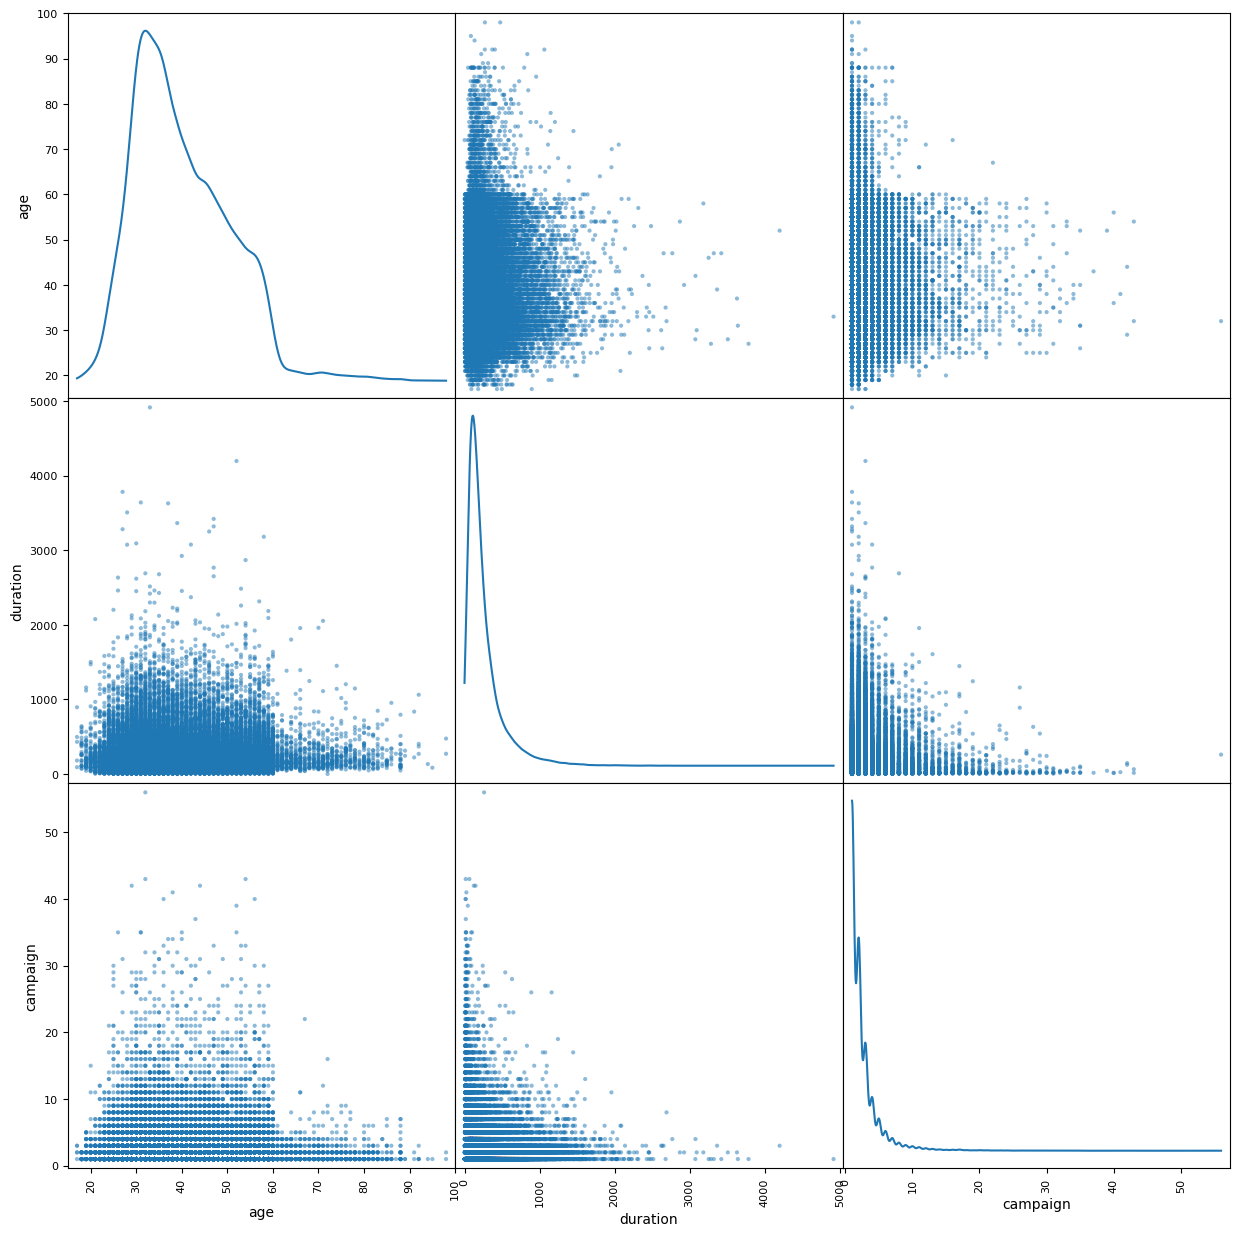

In [22]:
pd.plotting.scatter_matrix(
    df[["age", "duration", "campaign"]],
    figsize = (15, 15),
    diagonal = "kde", 
    cmap = 'coolwarm')
plt.show()

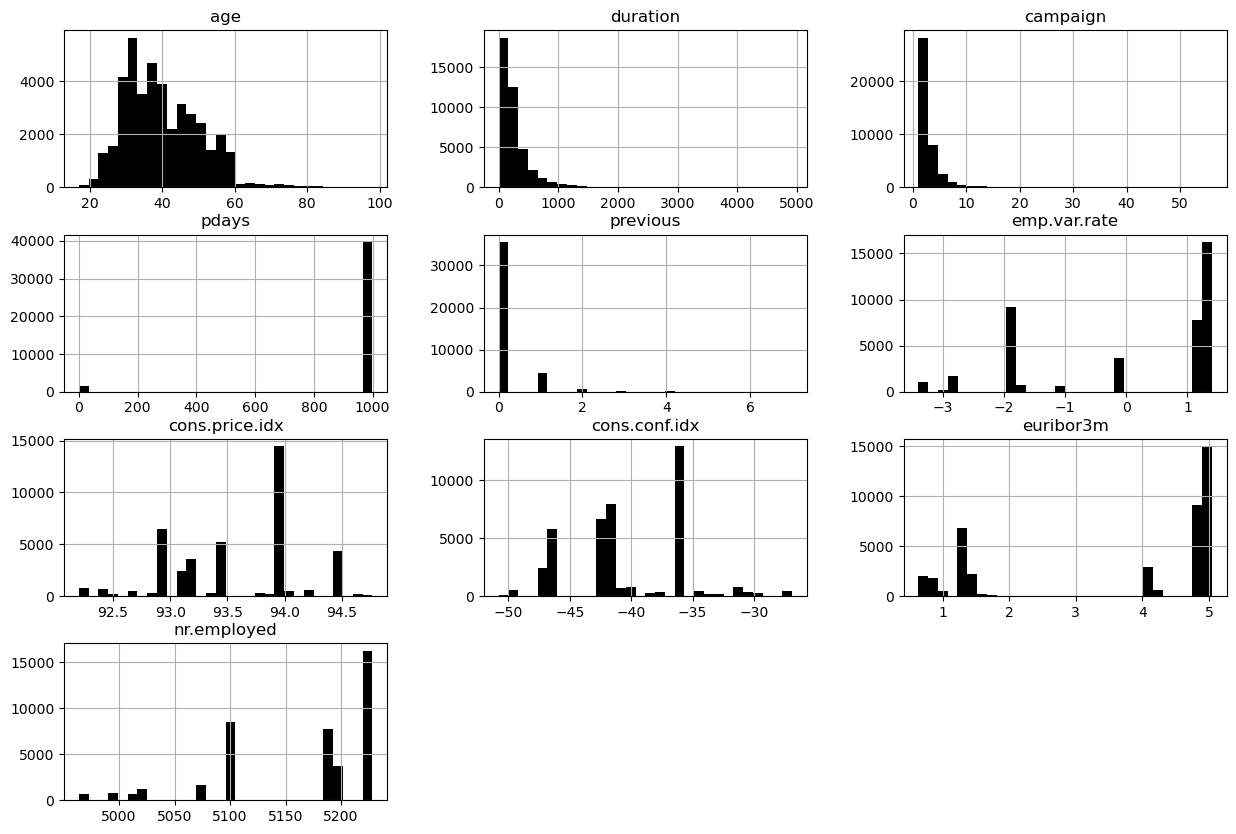

In [23]:
df.hist(color = "k",
        bins = 30,
        figsize = (15, 10))
plt.show()

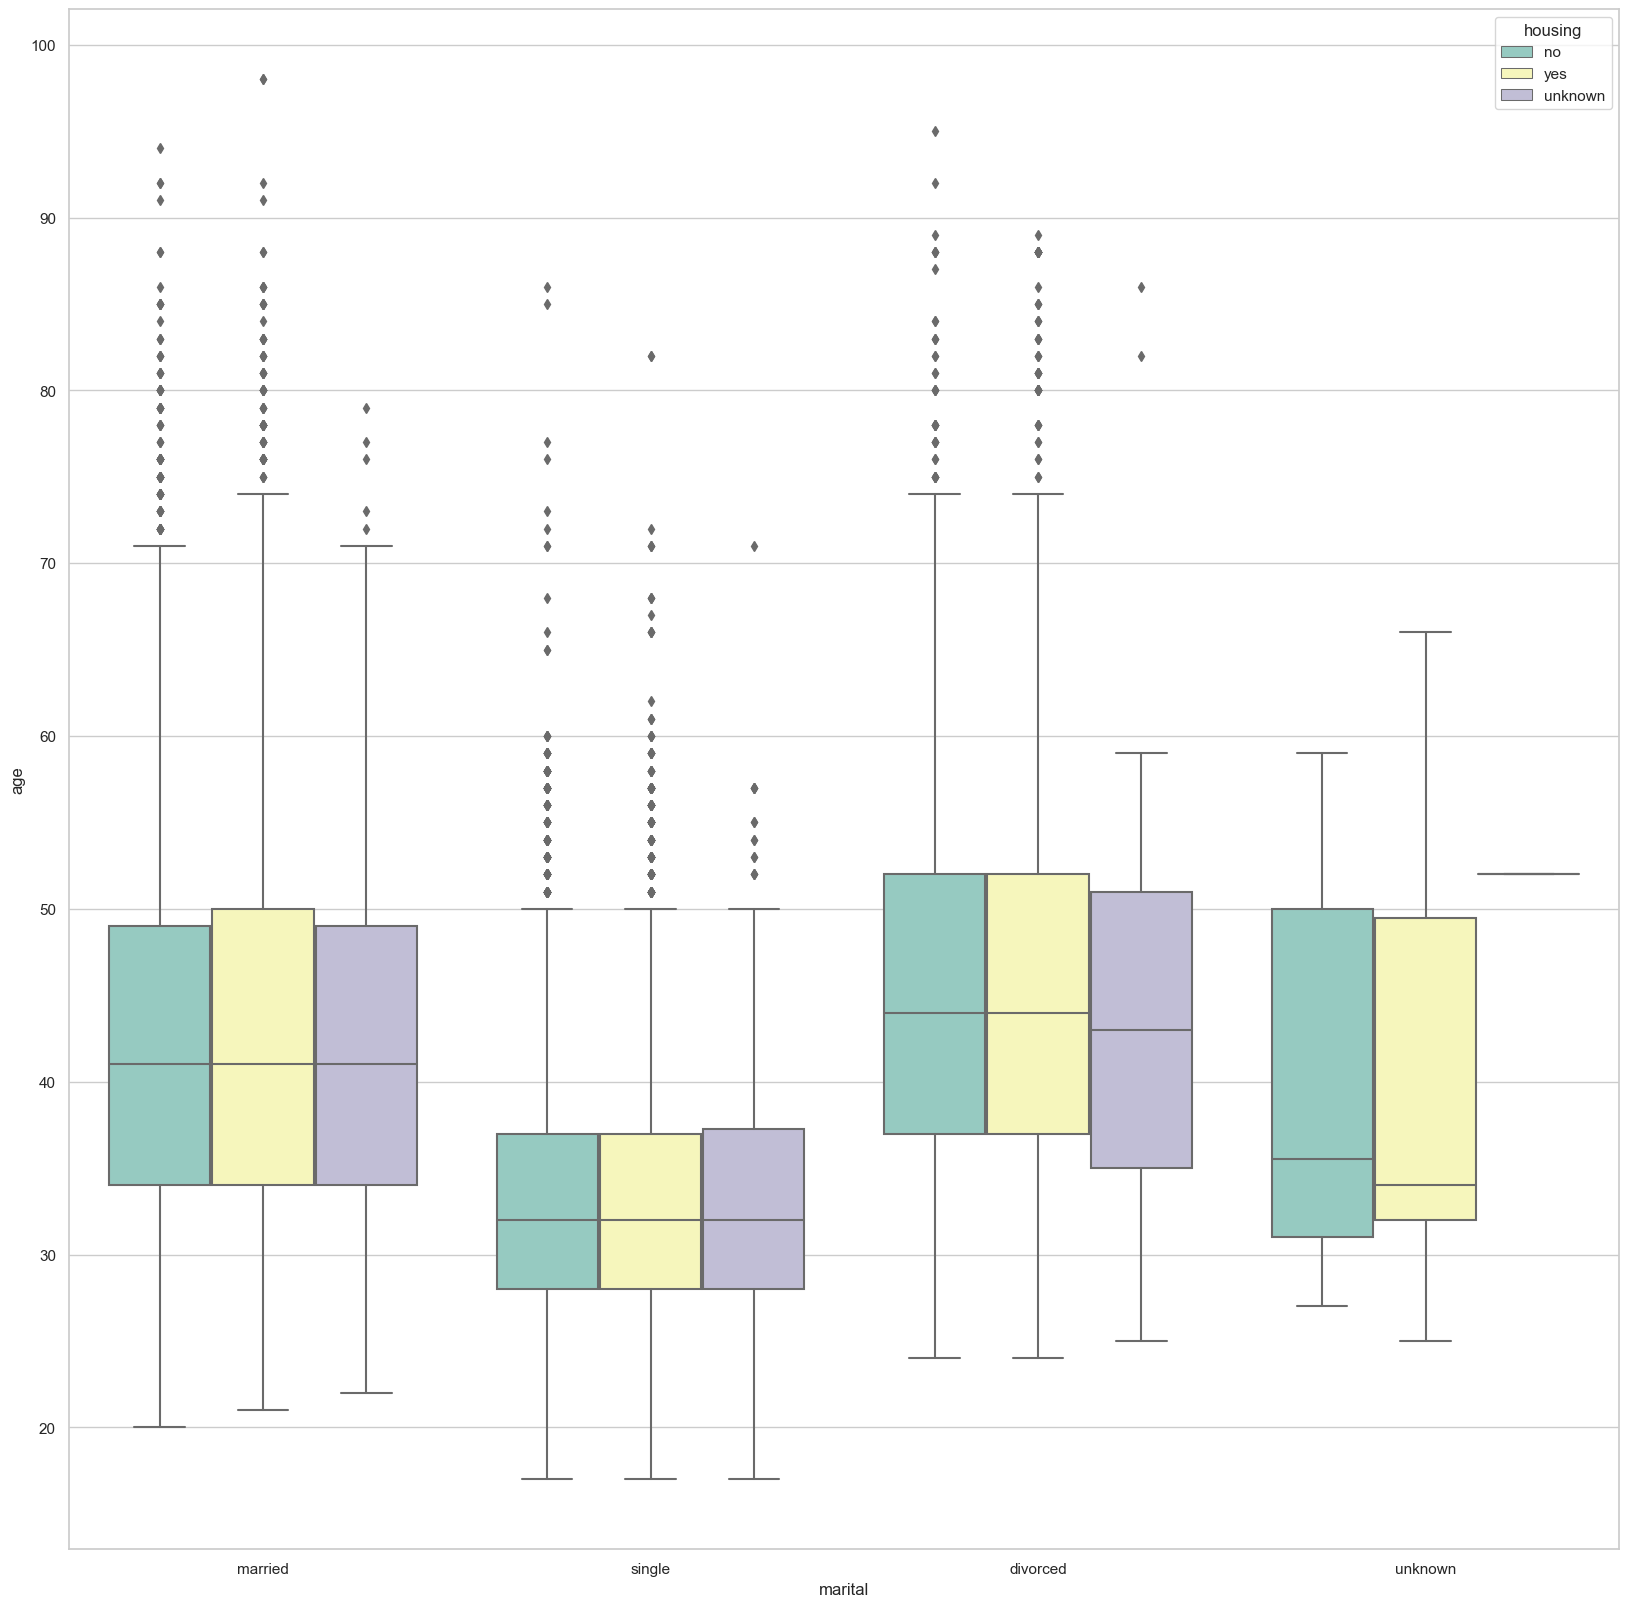

In [24]:

sns.set(style="whitegrid")
plt.figure(figsize=(20, 20))
sns.boxplot(x="marital", y="age", hue="housing", data=df, width=0.8, palette="Set3")

plt.show()

In [25]:
df.pivot_table(
    ["age", "campaign"],
    ["education"],
    aggfunc = ["mean", "count"],
)

mean            count         
                           age  campaign    age campaign
education                                               
basic.4y             47.596504  2.600575   4176     4176
basic.6y             40.448953  2.556283   2292     2292
basic.9y             39.061208  2.532341   6045     6045
high.school          37.998213  2.568576   9515     9515
illiterate           48.500000  2.277778     18       18
professional.course  40.080107  2.586115   5243     5243
university.degree    38.879191  2.563527  12168    12168
unknown              43.481225  2.596187   1731     1731

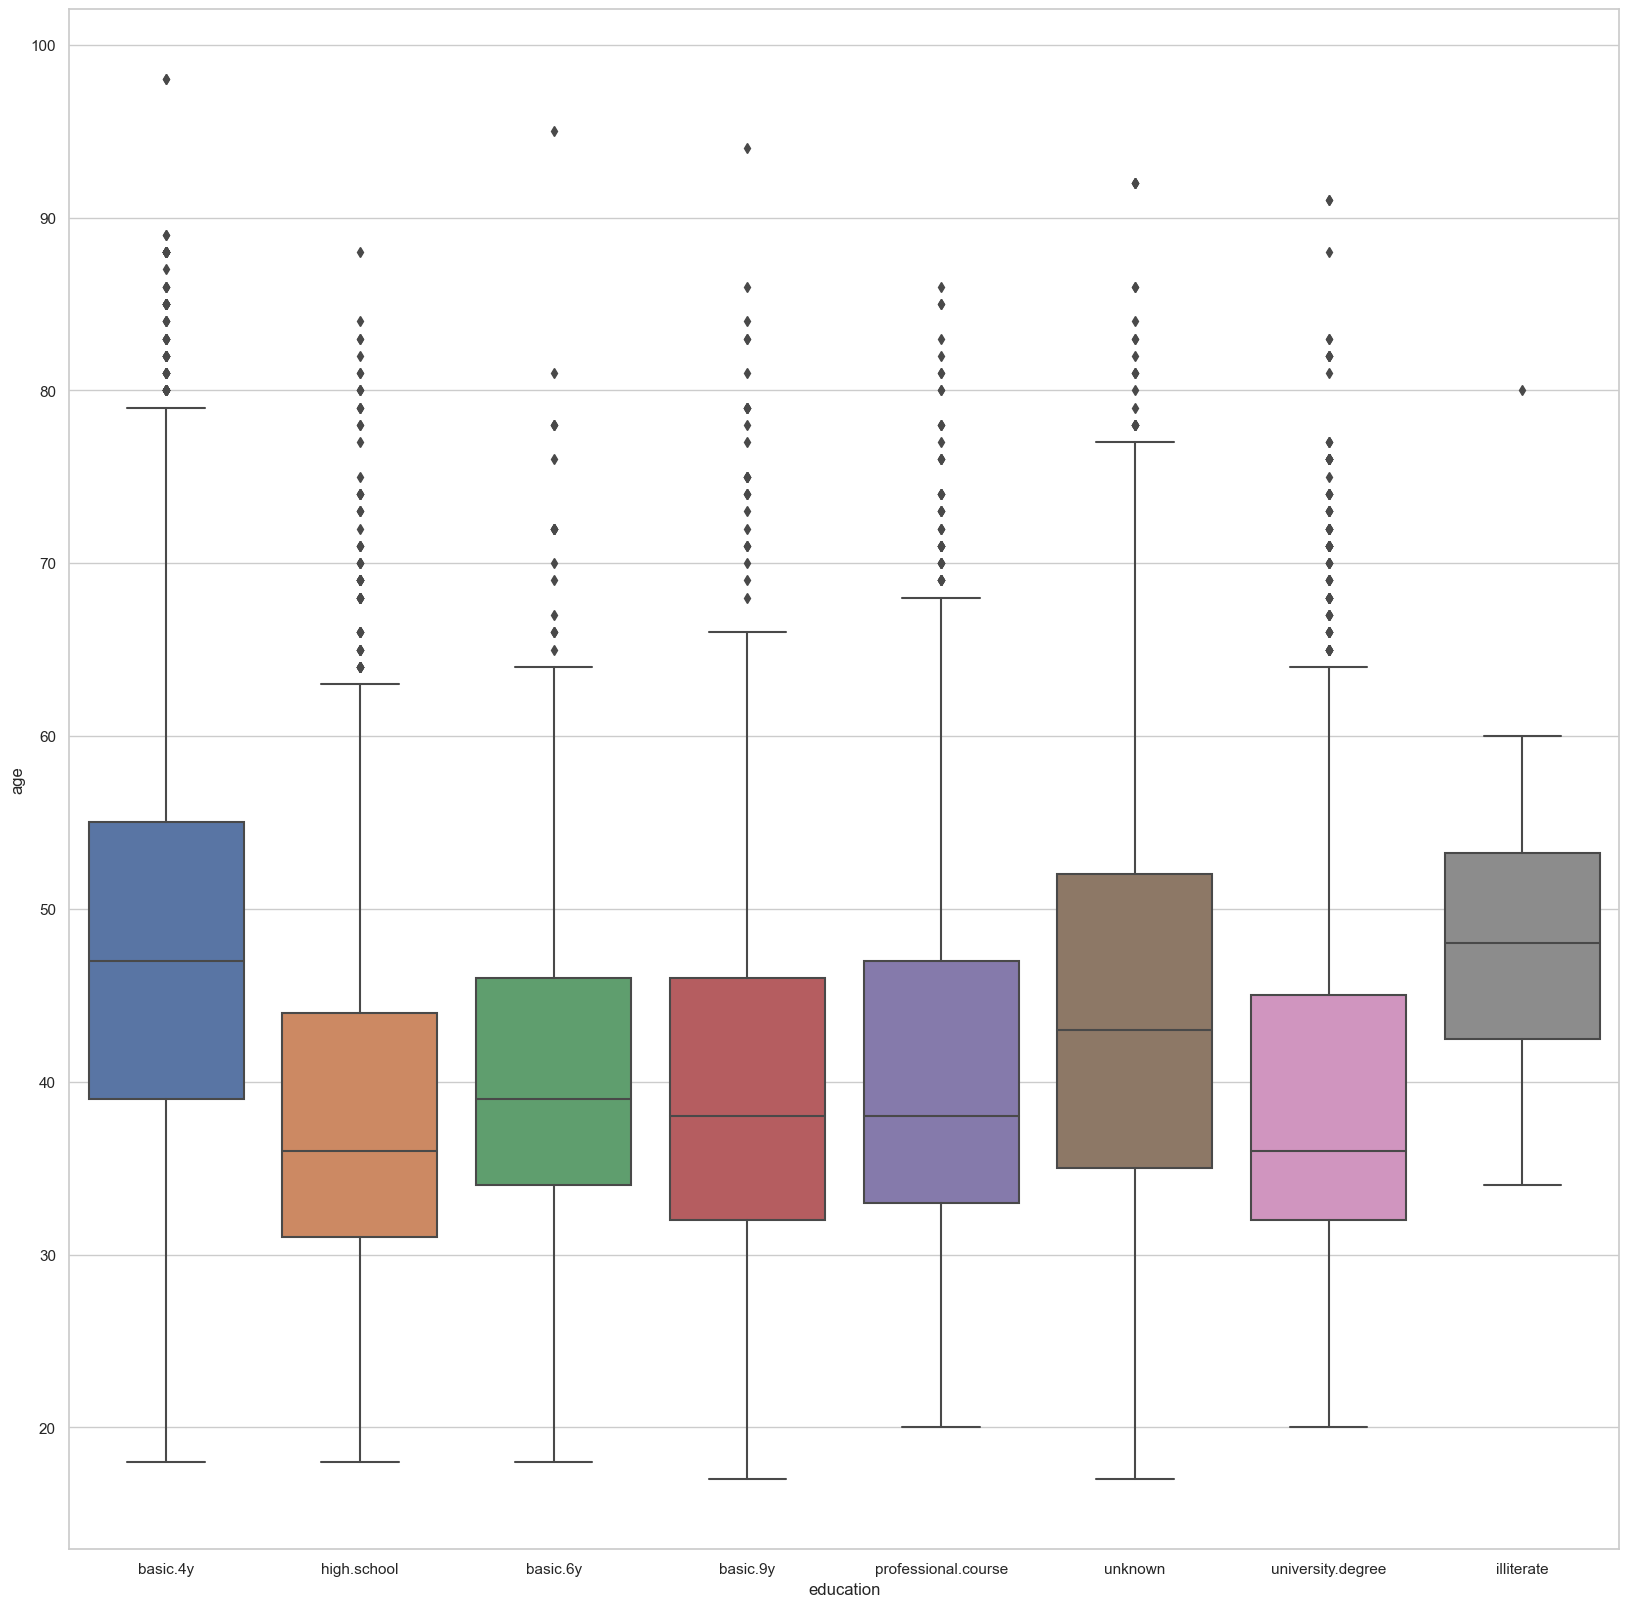

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 20))
sns.boxplot(x="education", y="age", data=df, width=0.8)

plt.show()

The dataset is imbalanced, we will need to keep that in mind when building our models!

In [27]:
# Get X, y
y = df["y"].map({"no":0, "yes":1})
X = df.drop("y", axis=1)

In [28]:
X.drop("duration", inplace=True, axis=1)

In [29]:
X.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [30]:
num_features = ["age", "campaign", "pdays", "previous", "emp.var.rate", 
                "cons.price.idx", "cons.conf.idx","euribor3m", "nr.employed"]

cat_features = ["job", "marital", "education","default", "housing", "loan",
                "contact", "month", "day_of_week", "poutcome"]

We'll define a new `ColumnTransformer` object (new in sklearn 0.20) that keeps our numerical features and apply one hot encoding on our categorical features. That will allow us to create a clean pipeline that includes both features engineering (one hot encoding here) and training the model (a nice way to avoid data leakage)

In [31]:
preprocessor = ColumnTransformer([("numerical", "passthrough", num_features), 
                                  ("categorical", OneHotEncoder(sparse=False, handle_unknown="ignore"),
                                   cat_features)])

<h1> Creating model training pipelines </h1>

In [32]:

# Random Forest
rf_model = Pipeline([("preprocessor", preprocessor), 
                     ("model", RandomForestClassifier(class_weight="balanced", n_estimators=100, n_jobs=-1))])

Let's split the data into training and test sets.

<h1>Splitting the data</h1>

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3, random_state=42)

# Random Forest

In [34]:
gs = GridSearchCV(rf_model, {"model__max_depth": [10, 15], 
                             "model__min_samples_split": [5, 10]}, 
                  n_jobs=-1, cv=5, scoring="accuracy")

gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         'passthrough',
                                                                         ['age',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
                                                                          'emp.var.rate',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                                          'euribor3m',
                                                       

Let's see our best parameters and score

In [35]:
print(gs.best_params_)
print(gs.best_score_)

{'model__max_depth': 15, 'model__min_samples_split': 5}
0.873781645795167


In [36]:
rf_model.set_params(**gs.best_params_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'mon

In [37]:
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred)

0.8798252002913328

## Metrics and Relevance:
### Accuracy:

Relevant for overall model performance evaluation.
### Precision and Recall:

Useful for understanding the model's ability to correctly classify positive instances.
### F1 Score:

A balance between precision and recall, important for imbalanced datasets.
### Confusion Matrix:

Provides a detailed understanding of model errors.

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8798252002913328
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     10965
           1       0.47      0.58      0.52      1392

    accuracy                           0.88     12357
   macro avg       0.71      0.75      0.73     12357
weighted avg       0.89      0.88      0.88     12357

Confusion Matrix:
[[10070   895]
 [  590   802]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


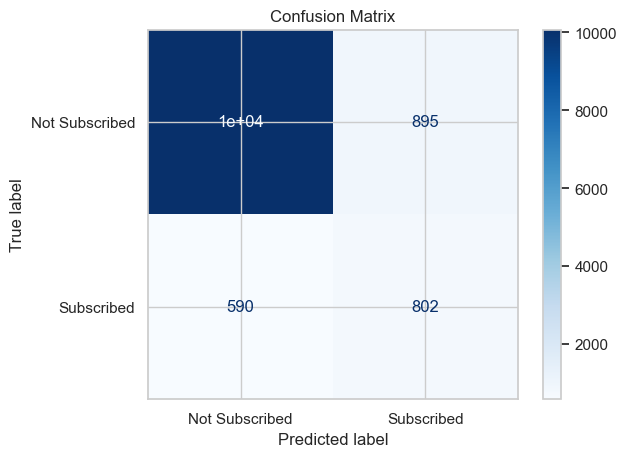

In [40]:
import matplotlib.pyplot as plt

plot_confusion_matrix(rf_model, X_test, y_test, cmap=plt.cm.Blues, display_labels=['Not Subscribed', 'Subscribed'])
plt.title('Confusion Matrix')
plt.show()

In [48]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Load the Bank Marketing dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/your_dataset.csv'
df = pd.read_csv('b')

# Separate features and target variable
X = df.drop('y', axis=1)
y = df['y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a Random Forest Classifier
model = RandomForestClassifier()

# Create a full pipeline including preprocessing and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = model.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot histograms for numeric features
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Plot the bar chart for feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Bank Marketing Dataset')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


HTTPError: HTTP Error 404: Not Found